In [1]:
import torchvision
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn
get_ipython().run_line_magic('matplotlib', 'inline')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [48]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])
train_dataset = torchvision.datasets.FashionMNIST('fashion-mnist/',
                                                  train=True,
                                                  download=True,
                                                  transform=transform)

test_dataset = torchvision.datasets.FashionMNIST('fashion-mnist/',
                                                 train=False,
                                                 download=True,
                                                 transform=transform)

In [49]:
BATCH_SIZE = 100
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, shuffle=True, batch_size=BATCH_SIZE)

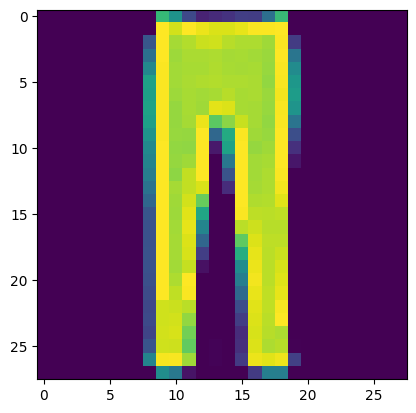

In [50]:
%matplotlib inline 
from matplotlib import pyplot as plt

for x,_ in train_loader:
    plt.imshow(x.numpy()[0][0],)
    break

In [4]:
batch = next(iter(train_loader))
print(batch[0].shape, batch[1].shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
class GeneratorModel(nn.Module):
  
  def __init__(self):
    super(GeneratorModel, self).__init__()
    input_dim = 100
    output_dim = 784
    self.hidden_layer1 = nn.Sequential(
    nn.Linear(input_dim, 256),
    nn.LeakyReLU(0.2)
    )
    self.hidden_layer2 = nn.Sequential(
    nn.Linear(256, 512),
    nn.LeakyReLU(0.2)
    )
    self.hidden_layer3 = nn.Sequential(
    nn.Linear(512, 1024),
    nn.LeakyReLU(0.2)
    )
    self.output_layer = nn.Sequential(
    nn.Linear(1024, output_dim),
    nn.Tanh()
    )
    
  def forward(self, x):
    output = self.hidden_layer1(x)
    output = self.hidden_layer2(output)
    output = self.hidden_layer3(output)
    output = self.output_layer(output)
    return output.to(device)

In [20]:
class DiscriminatorModel(nn.Module):
  
  def __init__(self):
    super(DiscriminatorModel, self).__init__()
    input_dim = 784
    output_dim = 1
    self.hidden_layer1 = nn.Sequential(
    nn.Linear(input_dim, 1024),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.3)
    )
    self.hidden_layer2 = nn.Sequential(
    nn.Linear(1024, 512),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.3)
    )
    self.hidden_layer3 = nn.Sequential(
    nn.Linear(512, 256),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.3)
    )
    self.output_layer = nn.Sequential(
    nn.Linear(256, output_dim),
    nn.Sigmoid()
    )
    
  def forward(self, x):
    output = self.hidden_layer1(x)
    output = self.hidden_layer2(output)
    output = self.hidden_layer3(output)
    output = self.output_layer(output)
    return output.to(device)

In [121]:
discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)

GeneratorModel(
  (hidden_layer1): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (output_layer): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

In [52]:
from torch import optim as optim

loss = nn.BCELoss()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

[0/100]: loss_d: 0.521, loss_g: 1.786
[1/100]: loss_d: 0.545, loss_g: 1.409
[2/100]: loss_d: 0.459, loss_g: 1.592
[3/100]: loss_d: 0.483, loss_g: 1.550
[4/100]: loss_d: 0.496, loss_g: 1.592
[5/100]: loss_d: 0.470, loss_g: 1.594
[6/100]: loss_d: 0.446, loss_g: 1.667
[7/100]: loss_d: 0.434, loss_g: 1.627
[8/100]: loss_d: 0.450, loss_g: 1.552
Training Steps Completed:  499


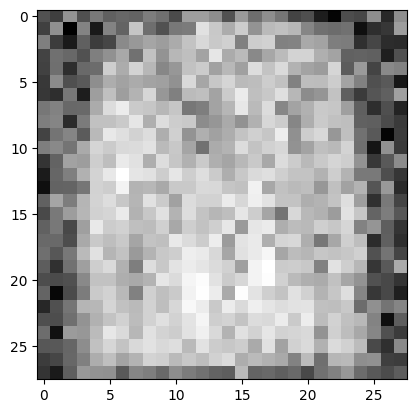

[9/100]: loss_d: 0.462, loss_g: 1.525
[10/100]: loss_d: 0.475, loss_g: 1.488
[11/100]: loss_d: 0.467, loss_g: 1.408
[12/100]: loss_d: 0.471, loss_g: 1.508
[13/100]: loss_d: 0.473, loss_g: 1.457
[14/100]: loss_d: 0.453, loss_g: 1.526
[15/100]: loss_d: 0.467, loss_g: 1.492
[16/100]: loss_d: 0.466, loss_g: 1.429
[17/100]: loss_d: 0.466, loss_g: 1.463
[18/100]: loss_d: 0.466, loss_g: 1.477
Training Steps Completed:  499


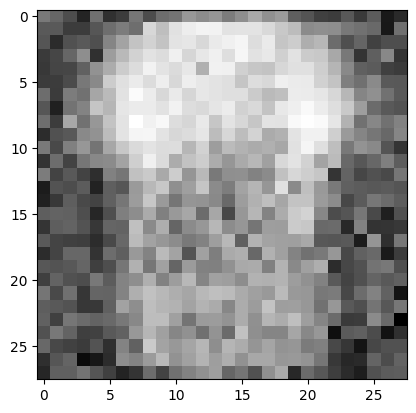

[19/100]: loss_d: 0.461, loss_g: 1.452
[20/100]: loss_d: 0.469, loss_g: 1.480
[21/100]: loss_d: 0.448, loss_g: 1.427
[22/100]: loss_d: 0.462, loss_g: 1.442
[23/100]: loss_d: 0.475, loss_g: 1.402
[24/100]: loss_d: 0.495, loss_g: 1.302
[25/100]: loss_d: 0.492, loss_g: 1.474
[26/100]: loss_d: 0.475, loss_g: 1.400
[27/100]: loss_d: 0.482, loss_g: 1.468
[28/100]: loss_d: 0.458, loss_g: 1.457
Training Steps Completed:  499


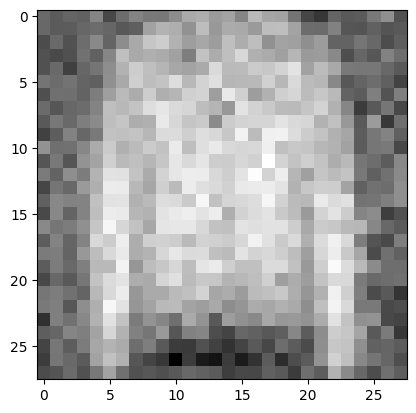

[29/100]: loss_d: 0.482, loss_g: 1.368
[30/100]: loss_d: 0.497, loss_g: 1.376
[31/100]: loss_d: 0.485, loss_g: 1.392
[32/100]: loss_d: 0.485, loss_g: 1.403
[33/100]: loss_d: 0.462, loss_g: 1.357
[34/100]: loss_d: 0.478, loss_g: 1.415
[35/100]: loss_d: 0.461, loss_g: 1.455
[36/100]: loss_d: 0.480, loss_g: 1.381
[37/100]: loss_d: 0.481, loss_g: 1.367
[38/100]: loss_d: 0.493, loss_g: 1.297
Training Steps Completed:  499


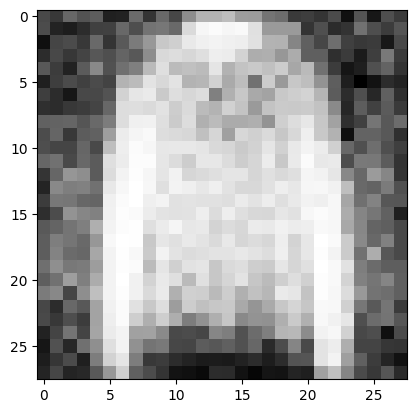

[39/100]: loss_d: 0.501, loss_g: 1.326
[40/100]: loss_d: 0.488, loss_g: 1.315
[41/100]: loss_d: 0.486, loss_g: 1.298
[42/100]: loss_d: 0.492, loss_g: 1.467
[43/100]: loss_d: 0.486, loss_g: 1.344
[44/100]: loss_d: 0.494, loss_g: 1.339
[45/100]: loss_d: 0.491, loss_g: 1.376
[46/100]: loss_d: 0.485, loss_g: 1.364
[47/100]: loss_d: 0.489, loss_g: 1.332
[48/100]: loss_d: 0.481, loss_g: 1.305
Training Steps Completed:  499


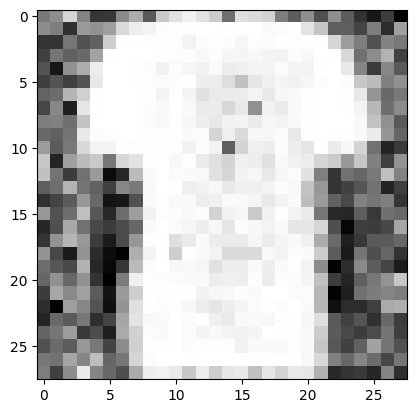

[49/100]: loss_d: 0.484, loss_g: 1.401
[50/100]: loss_d: 0.472, loss_g: 1.479
[51/100]: loss_d: 0.462, loss_g: 1.467
[52/100]: loss_d: 0.476, loss_g: 1.445
[53/100]: loss_d: 0.460, loss_g: 1.502
[54/100]: loss_d: 0.471, loss_g: 1.473
[55/100]: loss_d: 0.452, loss_g: 1.450
[56/100]: loss_d: 0.462, loss_g: 1.613
[57/100]: loss_d: 0.456, loss_g: 1.387
[58/100]: loss_d: 0.466, loss_g: 1.361
Training Steps Completed:  499


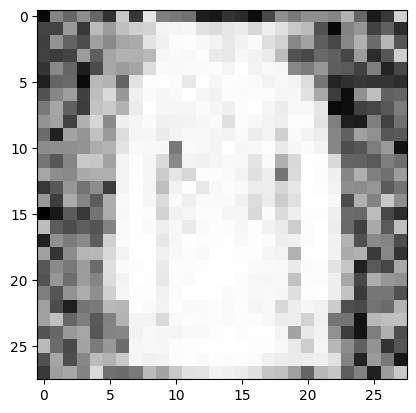

[59/100]: loss_d: 0.478, loss_g: 1.401
[60/100]: loss_d: 0.483, loss_g: 1.345
[61/100]: loss_d: 0.470, loss_g: 1.482
[62/100]: loss_d: 0.463, loss_g: 1.378
[63/100]: loss_d: 0.474, loss_g: 1.421
[64/100]: loss_d: 0.473, loss_g: 1.372
[65/100]: loss_d: 0.462, loss_g: 1.407
[66/100]: loss_d: 0.461, loss_g: 1.440
[67/100]: loss_d: 0.464, loss_g: 1.413
[68/100]: loss_d: 0.468, loss_g: 1.353
Training Steps Completed:  499


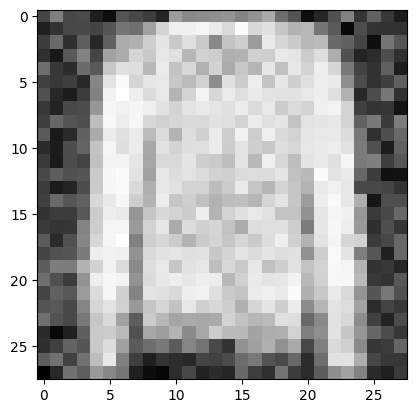

[69/100]: loss_d: 0.476, loss_g: 1.674
[70/100]: loss_d: 0.458, loss_g: 1.451
[71/100]: loss_d: 0.470, loss_g: 1.384
[72/100]: loss_d: 0.468, loss_g: 1.401
[73/100]: loss_d: 0.481, loss_g: 1.304
[74/100]: loss_d: 0.474, loss_g: 1.310
[75/100]: loss_d: 0.488, loss_g: 1.422
[76/100]: loss_d: 0.485, loss_g: 1.360
[77/100]: loss_d: 0.479, loss_g: 1.541
[78/100]: loss_d: 0.488, loss_g: 1.367
Training Steps Completed:  499


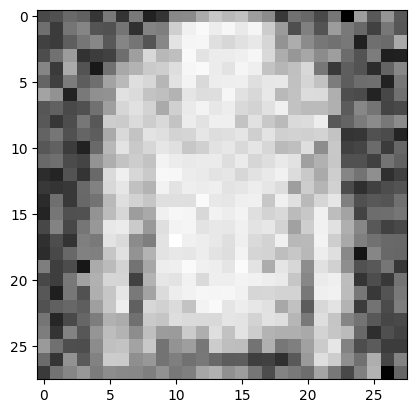

[79/100]: loss_d: 0.483, loss_g: 1.435
[80/100]: loss_d: 0.469, loss_g: 1.400
[81/100]: loss_d: 0.468, loss_g: 1.373
[82/100]: loss_d: 0.483, loss_g: 1.294
[83/100]: loss_d: 0.491, loss_g: 1.354
[84/100]: loss_d: 0.487, loss_g: 1.460
[85/100]: loss_d: 0.475, loss_g: 1.379
[86/100]: loss_d: 0.494, loss_g: 1.327
[87/100]: loss_d: 0.493, loss_g: 1.313
[88/100]: loss_d: 0.484, loss_g: 1.309
Training Steps Completed:  499


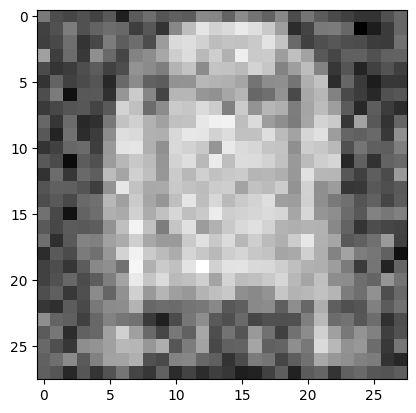

[89/100]: loss_d: 0.479, loss_g: 1.408
[90/100]: loss_d: 0.473, loss_g: 1.433
[91/100]: loss_d: 0.482, loss_g: 1.355
[92/100]: loss_d: 0.479, loss_g: 1.338
[93/100]: loss_d: 0.474, loss_g: 1.389
[94/100]: loss_d: 0.488, loss_g: 1.394
[95/100]: loss_d: 0.465, loss_g: 1.429
[96/100]: loss_d: 0.479, loss_g: 1.371
[97/100]: loss_d: 0.478, loss_g: 1.327
[98/100]: loss_d: 0.478, loss_g: 1.324
Training Steps Completed:  499


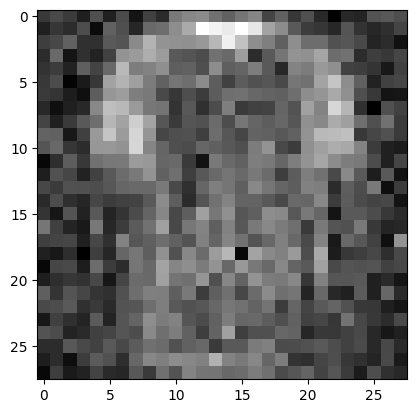

[99/100]: loss_d: 0.484, loss_g: 1.453


In [42]:
n_epochs = 100
for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(train_loader):
        
        # Generate noise and move it the device
        noise = torch.randn(BATCH_SIZE,100).to(device)
        # Forward pass         
        generated_data = generator(noise) # batch_size X 784
        
        true_data = data_input[0].view(BATCH_SIZE, 784).to(device) # batch_size X 784
        digit_labels = data_input[1] # batch_size
        true_labels = torch.ones(BATCH_SIZE).to(device)
        
        # Clear optimizer gradients        
        discriminator_optimizer.zero_grad()
        # Forward pass with true data as input
        discriminator_output_for_true_data = discriminator(true_data).view(BATCH_SIZE)
        # Compute Loss
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)
        # Forward pass with generated data as input
        discriminator_output_for_generated_data = discriminator(generated_data.detach()).view(BATCH_SIZE)
        # Compute Loss 
        generator_discriminator_loss = loss(
            discriminator_output_for_generated_data, torch.zeros(BATCH_SIZE).to(device)
        )
        # Average the loss
        discriminator_loss = (
            true_discriminator_loss + generator_discriminator_loss
        ) / 2
               
        # Backpropagate the losses for Discriminator model      
        discriminator_loss.backward()
        discriminator_optimizer.step()

        D_loss.append(discriminator_loss.data.item())
        
        
        # Clear optimizer gradients

        generator_optimizer.zero_grad()
        
        # It's a choice to generate the data again
        generated_data = generator(noise) # batch_size X 784
        # Forward pass with the generated data
        discriminator_output_on_generated_data = discriminator(generated_data).view(BATCH_SIZE)
        # Compute loss
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        # Backpropagate losses for Generator model.
        generator_loss.backward()
        generator_optimizer.step()
        
        G_loss.append(generator_loss.data.item())
        # Evaluate the model
        if ((batch_idx + 1)% 500 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Steps Completed: ", batch_idx)
            
            with torch.no_grad():
                noise = torch.randn(BATCH_SIZE,100).to(device)
                generated_data = generator(noise).cpu().view(BATCH_SIZE, 28, 28)
                for x in generated_data:
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    plt.show()

                    break


    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(D_loss)), torch.mean(torch.FloatTensor(G_loss))))

In [44]:
torch.save(generator.state_dict(), "generatorDC.pth")

In [38]:
for batch_idx, data_input in enumerate(data_loader):
    h=data_input
    break

In [39]:
h[0].shape

torch.Size([100, 1, 28, 28])

In [37]:
from torchvision import transforms, datasets

training_parameters = {
    "n_epochs": 100,
    "batch_size": 100,
}
data_loader = torch.utils.data.DataLoader(
  
  datasets.MNIST('./', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=training_parameters["batch_size"], shuffle=True)

2.3%

100.0%


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw



100.0%


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw



100.0%


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw



100.0%

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



In [130]:
class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        input_dim = 100 + 10
        output_dim = 784
        self.label_embedding = nn.Embedding(10, 10)
        
        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x,c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output.to(device)

class DiscriminatorModel(nn.Module):
    def __init__(self):
        super(DiscriminatorModel, self).__init__()
        input_dim = 784 + 10
        output_dim = 1
        self.label_embedding = nn.Embedding(10, 10)

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x, c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)

        return output.to(device)

discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)

GeneratorModel(
  (label_embedding): Embedding(10, 10)
  (hidden_layer1): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

[0/100]: loss_d: 0.600, loss_g: 1.528
[1/100]: loss_d: 0.532, loss_g: 1.756
[2/100]: loss_d: 0.537, loss_g: 1.510
[3/100]: loss_d: 0.520, loss_g: 1.398
[4/100]: loss_d: 0.523, loss_g: 1.388
[5/100]: loss_d: 0.526, loss_g: 1.355
[6/100]: loss_d: 0.509, loss_g: 1.331
[7/100]: loss_d: 0.529, loss_g: 1.255
[8/100]: loss_d: 0.587, loss_g: 1.136
Training Steps Completed:  499
4


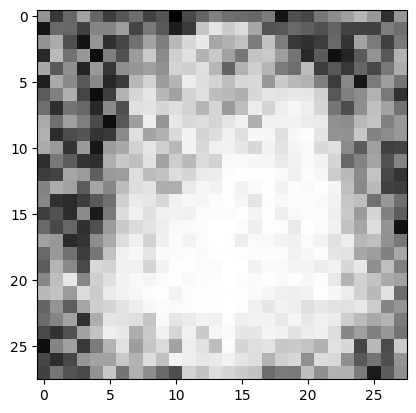

[9/100]: loss_d: 0.599, loss_g: 1.115
[10/100]: loss_d: 0.609, loss_g: 1.041
[11/100]: loss_d: 0.610, loss_g: 1.082
[12/100]: loss_d: 0.592, loss_g: 1.089
[13/100]: loss_d: 0.604, loss_g: 1.060
[14/100]: loss_d: 0.612, loss_g: 1.183
[15/100]: loss_d: 0.587, loss_g: 1.178
[16/100]: loss_d: 0.601, loss_g: 1.188
[17/100]: loss_d: 0.586, loss_g: 1.158
[18/100]: loss_d: 0.599, loss_g: 1.049
Training Steps Completed:  499
0


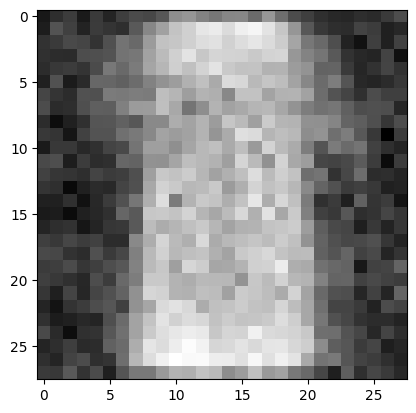

[19/100]: loss_d: 0.612, loss_g: 1.043
[20/100]: loss_d: 0.618, loss_g: 1.117
[21/100]: loss_d: 0.614, loss_g: 1.028
[22/100]: loss_d: 0.616, loss_g: 1.097
[23/100]: loss_d: 0.586, loss_g: 1.063
[24/100]: loss_d: 0.595, loss_g: 1.106
[25/100]: loss_d: 0.611, loss_g: 1.099
[26/100]: loss_d: 0.587, loss_g: 1.111
[27/100]: loss_d: 0.607, loss_g: 1.150
[28/100]: loss_d: 0.605, loss_g: 1.062
Training Steps Completed:  499
8


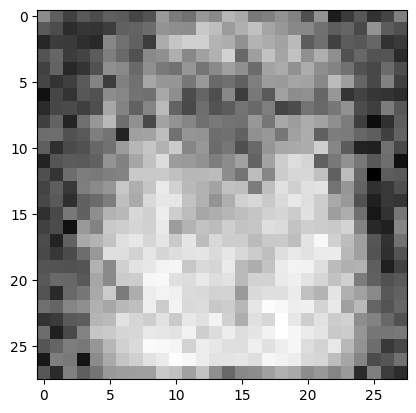

[29/100]: loss_d: 0.583, loss_g: 1.090
[30/100]: loss_d: 0.601, loss_g: 1.043
[31/100]: loss_d: 0.602, loss_g: 1.075
[32/100]: loss_d: 0.591, loss_g: 1.099
[33/100]: loss_d: 0.590, loss_g: 1.237
[34/100]: loss_d: 0.591, loss_g: 1.145
[35/100]: loss_d: 0.578, loss_g: 1.188
[36/100]: loss_d: 0.598, loss_g: 1.121
[37/100]: loss_d: 0.599, loss_g: 1.091
[38/100]: loss_d: 0.583, loss_g: 1.139
Training Steps Completed:  499
6


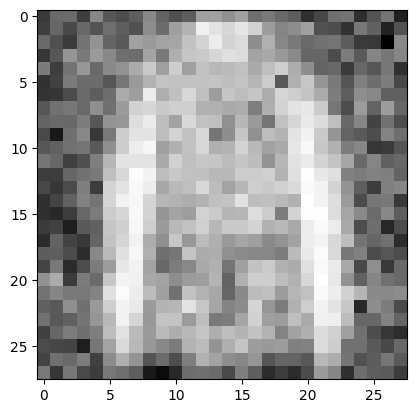

[39/100]: loss_d: 0.582, loss_g: 1.165
[40/100]: loss_d: 0.567, loss_g: 1.137
[41/100]: loss_d: 0.587, loss_g: 1.145
[42/100]: loss_d: 0.575, loss_g: 1.193
[43/100]: loss_d: 0.591, loss_g: 1.151
[44/100]: loss_d: 0.588, loss_g: 1.133
[45/100]: loss_d: 0.576, loss_g: 1.217
[46/100]: loss_d: 0.590, loss_g: 1.152
[47/100]: loss_d: 0.572, loss_g: 1.153
[48/100]: loss_d: 0.591, loss_g: 1.050
Training Steps Completed:  499
9


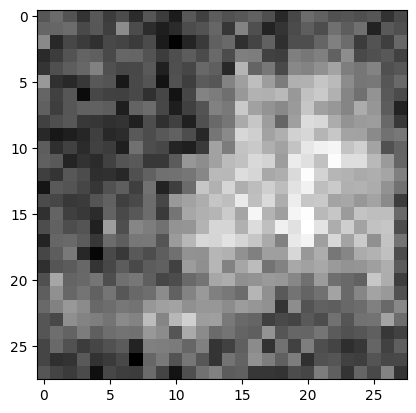

[49/100]: loss_d: 0.563, loss_g: 1.207
[50/100]: loss_d: 0.588, loss_g: 1.114
[51/100]: loss_d: 0.571, loss_g: 1.150
[52/100]: loss_d: 0.569, loss_g: 1.172
[53/100]: loss_d: 0.577, loss_g: 1.134
[54/100]: loss_d: 0.599, loss_g: 1.157
[55/100]: loss_d: 0.587, loss_g: 1.109
[56/100]: loss_d: 0.579, loss_g: 1.201
[57/100]: loss_d: 0.571, loss_g: 1.161
[58/100]: loss_d: 0.577, loss_g: 1.187
Training Steps Completed:  499
9


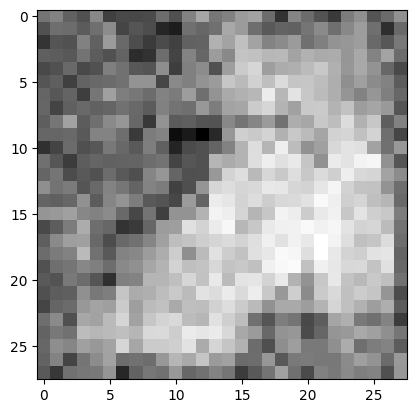

[59/100]: loss_d: 0.563, loss_g: 1.151
[60/100]: loss_d: 0.572, loss_g: 1.176
[61/100]: loss_d: 0.570, loss_g: 1.218
[62/100]: loss_d: 0.571, loss_g: 1.154
[63/100]: loss_d: 0.558, loss_g: 1.232
[64/100]: loss_d: 0.563, loss_g: 1.264
[65/100]: loss_d: 0.575, loss_g: 1.099
[66/100]: loss_d: 0.574, loss_g: 1.187
[67/100]: loss_d: 0.567, loss_g: 1.187
[68/100]: loss_d: 0.575, loss_g: 1.179
Training Steps Completed:  499
2


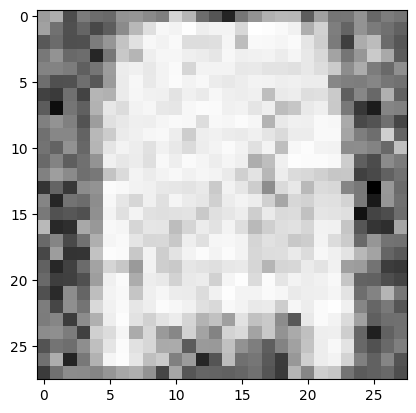

[69/100]: loss_d: 0.561, loss_g: 1.236
[70/100]: loss_d: 0.577, loss_g: 1.110
[71/100]: loss_d: 0.551, loss_g: 1.218
[72/100]: loss_d: 0.566, loss_g: 1.165
[73/100]: loss_d: 0.576, loss_g: 1.205
[74/100]: loss_d: 0.577, loss_g: 1.196
[75/100]: loss_d: 0.571, loss_g: 1.271
[76/100]: loss_d: 0.552, loss_g: 1.206
[77/100]: loss_d: 0.547, loss_g: 1.226
[78/100]: loss_d: 0.572, loss_g: 1.182
Training Steps Completed:  499
5


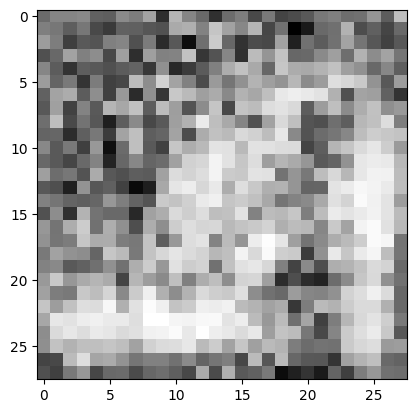

[79/100]: loss_d: 0.562, loss_g: 1.174
[80/100]: loss_d: 0.573, loss_g: 1.191
[81/100]: loss_d: 0.572, loss_g: 1.146
[82/100]: loss_d: 0.553, loss_g: 1.177
[83/100]: loss_d: 0.568, loss_g: 1.236
[84/100]: loss_d: 0.572, loss_g: 1.162
[85/100]: loss_d: 0.584, loss_g: 1.107
[86/100]: loss_d: 0.563, loss_g: 1.142
[87/100]: loss_d: 0.577, loss_g: 1.190
[88/100]: loss_d: 0.578, loss_g: 1.158
Training Steps Completed:  499
9


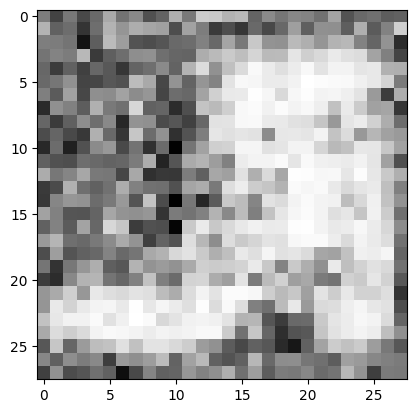

[89/100]: loss_d: 0.569, loss_g: 1.196
[90/100]: loss_d: 0.563, loss_g: 1.274
[91/100]: loss_d: 0.557, loss_g: 1.221
[92/100]: loss_d: 0.549, loss_g: 1.252
[93/100]: loss_d: 0.557, loss_g: 1.193
[94/100]: loss_d: 0.568, loss_g: 1.185
[95/100]: loss_d: 0.573, loss_g: 1.148
[96/100]: loss_d: 0.563, loss_g: 1.182
[97/100]: loss_d: 0.553, loss_g: 1.241
[98/100]: loss_d: 0.538, loss_g: 1.253
Training Steps Completed:  499
5


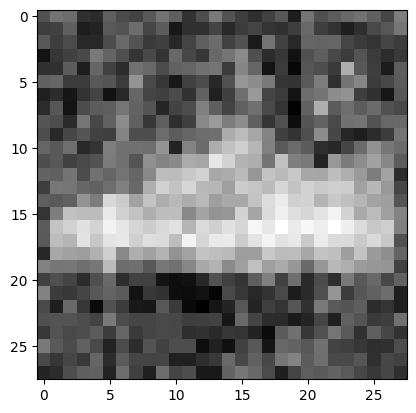

[99/100]: loss_d: 0.571, loss_g: 1.190


In [53]:
for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(train_loader):
        
        
        noise = torch.randn(BATCH_SIZE,100).to(device)
        fake_labels = torch.randint(0, 10, (BATCH_SIZE,)).to(device)
        generated_data = generator(noise, fake_labels) # batch_size X 784

        
        # Discriminator
        true_data = data_input[0].view(BATCH_SIZE, 784).to(device) # batch_size X 784
        digit_labels = data_input[1].to(device) # batch_size
        true_labels = torch.ones(BATCH_SIZE).to(device)
        
        discriminator_optimizer.zero_grad()

        discriminator_output_for_true_data = discriminator(true_data, digit_labels).view(BATCH_SIZE)
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)

        discriminator_output_for_generated_data = discriminator(generated_data.detach(), fake_labels).view(BATCH_SIZE)
        generator_discriminator_loss = loss(
            discriminator_output_for_generated_data, torch.zeros(BATCH_SIZE).to(device)
        )
        discriminator_loss = (
            true_discriminator_loss + generator_discriminator_loss
        ) / 2
        
        discriminator_loss.backward()
        discriminator_optimizer.step()

        D_loss.append(discriminator_loss.data.item())
        
        
        # Generator

        generator_optimizer.zero_grad()
        # It's a choice to generate the data again
        generated_data = generator(noise, fake_labels) # batch_size X 784
        discriminator_output_on_generated_data = discriminator(generated_data, fake_labels).view(BATCH_SIZE)
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        generator_loss.backward()
        generator_optimizer.step()
        
        G_loss.append(generator_loss.data.item())
        if ((batch_idx + 1)% 500 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Steps Completed: ", batch_idx)
            
            with torch.no_grad():
                noise = torch.randn(BATCH_SIZE,100).to(device)
                fake_labels = torch.randint(0, 10, (BATCH_SIZE,)).to(device)
                generated_data = generator(noise, fake_labels).cpu().view(BATCH_SIZE, 28, 28)
                for x in generated_data:
                    print(fake_labels[0].item())
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    plt.show()

                    break


    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(D_loss)), torch.mean(torch.FloatTensor(G_loss))))

In [54]:
torch.save(generator.state_dict(), "generatorCG.pth")

In [56]:
fake_labels

tensor([0, 3, 3, 0, 1, 0, 2, 9, 1, 7, 8, 8, 9, 8, 4, 5, 2, 6, 9, 9, 8, 5, 8, 2,
        6, 6, 0, 8, 0, 6, 0, 2, 8, 4, 7, 1, 7, 5, 4, 9, 3, 7, 7, 4, 3, 0, 9, 7,
        9, 4, 2, 3, 1, 6, 5, 0, 2, 9, 9, 6, 1, 9, 6, 8, 1, 2, 8, 7, 5, 1, 5, 0,
        7, 8, 9, 4, 6, 2, 4, 2, 2, 4, 2, 7, 1, 0, 0, 5, 0, 8, 2, 6, 9, 4, 4, 0,
        3, 7, 1, 3], device='cuda:0')

# Test outputs

# GAN

In [23]:
class GeneratorModel(nn.Module):
  
  def __init__(self):
    super(GeneratorModel, self).__init__()
    input_dim = 100
    output_dim = 784
    self.hidden_layer1 = nn.Sequential(
    nn.Linear(input_dim, 256),
    nn.LeakyReLU(0.2)
    )
    self.hidden_layer2 = nn.Sequential(
    nn.Linear(256, 512),
    nn.LeakyReLU(0.2)
    )
    self.hidden_layer3 = nn.Sequential(
    nn.Linear(512, 1024),
    nn.LeakyReLU(0.2)
    )
    self.output_layer = nn.Sequential(
    nn.Linear(1024, output_dim),
    nn.Tanh()
    )
    
  def forward(self, x):
    output = self.hidden_layer1(x)
    output = self.hidden_layer2(output)
    output = self.hidden_layer3(output)
    output = self.output_layer(output)
    return output.to(device)

In [24]:
dc = torch.load('DC.pth')
dc.eval()
dc.to(device)

GeneratorModel(
  (hidden_layer1): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (output_layer): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

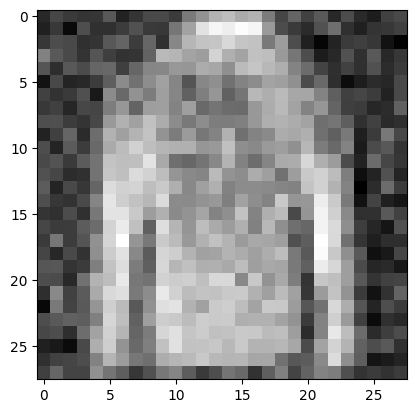

In [27]:
noise = torch.randn(1,100).to(device)
x=dc(noise)
plt.imshow(x.reshape(28,28).detach().cpu().numpy(), interpolation='nearest',cmap='gray')
plt.show()

# C-GAN

In [28]:
class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        input_dim = 100 + 10
        output_dim = 784
        self.label_embedding = nn.Embedding(10, 10)
        
        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x,c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output.to(device)

In [29]:
model = torch.load('CG.pth')
model.eval()
model.to(device)

GeneratorModel(
  (label_embedding): Embedding(10, 10)
  (hidden_layer1): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

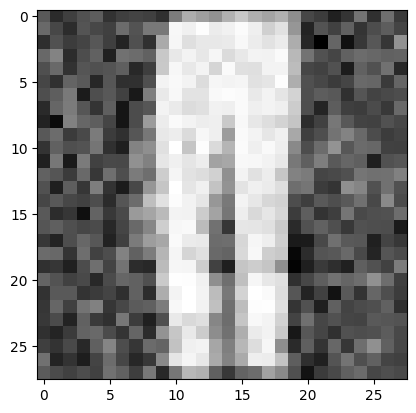

In [33]:
noise = torch.randn(1,100).to(device)
x=model(noise, torch.tensor([1], device='cuda:0'))
plt.imshow(x.reshape(28,28).detach().cpu().numpy(), interpolation='nearest',cmap='gray')
plt.show()

tensor([9, 1, 9, 5, 9, 6, 4, 4, 2, 1])